一、感知机算法-原始形式  
   算法描述：  
   输入:数据集$T = \{ (x_{1},y_{1}),(x_{2},y_{2}),..,(x_{n},y_{n})\}$，其中$x_{i} \in X = R^{n},y_{i} \in Y=\{-1,1\},i = 1,2,..,N$。学习率$\eta(0<\eta<1)$  
   输出：$w,b$ ；感知机模型：$f(x) = sign(w \cdot x + b)$  
   (1).选取初始值$w_{0},b_{0}$  
   (2).在训练数据中选取$(x_{i},y_{i})$  
   (3).如果$y_{i}(w\cdot x_{i}+b) \leqslant 0$  
       $w \leftarrow  w + \eta y_{i}x_{i}$  
       $b \leftarrow b + \eta y_{i}$  
   (4).转到(2),直到训练集中没有误分类点
       

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [46]:
import numpy as np

class Perceptron:
    def __init__(self):
        self.W = []
        self.b = 0
        self.eta = 0.1
    def __decission_func(self,x,y):
        return y * self.__clac_Wx_add_b(x)
    def __clac_Wx_add_b(self,x):
        sum = 0
        for i in range(len(x)):
            sum += self.W[i]*x[i]
        return sum + self.b
    def fit(self,X,Y):
        num_samples,feat_dim = X.shape
        self.W = np.zeros((feat_dim))
        self.b = 0
        OK = False
        while OK == False:
            num_Ok = 0
            for n in range(num_samples):
                xi = X[n,:]
                yi = Y[n]
                if self.__decission_func(xi,yi) <= 0:
                    self.W = self.W + self.eta * yi * xi
                    self.b = self.b + self.eta * yi
                else:
                    num_Ok += 1
                if num_Ok == num_samples:
                    OK = True
    def predict(self,x):
        return 1 if self.__clac_Wx_add_b(x) > 0 else -1

W= [ 0.1  0.1]  b= -0.3


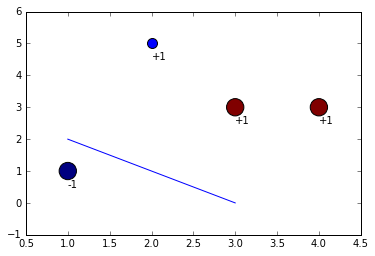

In [98]:
def clac_y(x,W,b):
    return -b / W[0] - W[1] / W[0] * x

X = np.array([[3,3],[4,3],[1,1]])
Y = np.array([1,1,-1])
clf = Perceptron()
clf.fit(X,Y)

color = [str(item/255.) for item in Y]
plt.scatter(X[:,0],X[:,1],c = color,s=300)
plt.text(3,2.5,s='+1')
plt.text(4,2.5,s='+1')
plt.text(1,0.5,s='-1')

print 'W=',clf.W,' b=',clf.b
x = [1,3]
y = []
for i in range(2):
    y.append(clac_y(x[i],clf.W,clf.b))
plt.plot(x,y)

#pridect data
xx=[2,5]
rsp = clf.predict(xx)
colr = [str(item/255.) for item in [rsp]]
plt.scatter(xx[0],xx[1],s=100)
sym = '+1' if rsp == 1 else '-1'
plt.text(xx[0],xx[1] - 0.5,s=sym)